## Small  and Easy project about prices for flats in London.


In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as pl
import plotly.express as px
import plotly.graph_objects as go

In [4]:
flats = pd.read_csv('../input/housing-prices-in-london/London.csv', index_col = 0)

FileNotFoundError: [Errno 2] No such file or directory: '../input/housing-prices-in-london/London.csv'

In [ ]:
flats.rename(columns = {'Property Name':'Property_Name','Price' : 'Price_in_Pounds',
                        'House Type':'House_Type', 'Area in sq ft' : 'Area_in_feets',
                        'No. of Bedrooms' : 'Number_of_Bedrooms', 'No. of Bathrooms' : 'Number_of_Bathrooms',
                        'No. of Receptions':'Number_of_Receptions', 'Postal Code':'Postal_Code',
                        'City/County' : 'City_County'}, inplace=True)


def house_type(df):
    type_int = []
    for x in df:
        if x == 'Mews':
            type_int.append(1)
        elif x == 'Duplex':
            type_int.append(2)
        elif x == 'Bungalow':
            type_int.append(3)
        elif x == 'Studio':
            type_int.append(4)
        elif x == 'Penthouse':
            type_int.append(5)
        elif x == 'New development':
            type_int.append(6)
        elif x == 'House':
            type_int.append(7)
        else:
            type_int.append(8)
    return type_int

flats['House_Type_Int'] = house_type(flats.House_Type)

In [ ]:
flats.head()

,Property_Name,Price_in_Pounds,House_Type,Area_in_feets,Number_of_Bedrooms,Number_of_Bathrooms,Number_of_Receptions,Location,City_County,Postal_Code,House_Type_Int
0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY,7
1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA,8
2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL,8
3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP,7
4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL,8


### Colomns meanings
1. **Property_Name:** Name of the property in the listings
2. **Price_in_Pounds:** Price of the property in Pounds (£)
3. **House_Type:** Contains one of the following types of houses (House, Flat/Apartment, New Development, Duplex, Penthouse, Studio, Bungalow, Mews)
4. **Area_in_feets:** Area of the property in $(ft)^2$
5. **No_of_Bedrooms:** Number of bedrooms in House
6. **No_of_Bathrooms:** Number of bathrooms in House
7. **No_of_Receptions:** Number of receptions in House
8. **Location:** Area in which the House is located
9. **City_County:** Includes London, Essex, Middlesex, Hertfordshire, Kent, and Surrey.
10. **Postal_Code:** Postal code of the house
11. **House_Type_Int:** House_Type but in numbers
12. **Address:** Address of the house that includes: City_County, Location, Property_Name and Postal Code

In [ ]:
flats.describe()

In [ ]:
flats.Number_of_Bedrooms.value_counts()

Number_of_Bedrooms
2     1078
3      706
4      576
5      453
1      414
6      176
7       53
0       10
8       10
9        3
10       1
Name: count, dtype: int64

## Mean, Meadian and Standatd Deviation

In [ ]:
mean_Price = round(flats.Price_in_Pounds.mean(),2)
mean_Area = round(flats.Area_in_feets.mean(),2)
mean_Bedrooms = round(flats.Number_of_Bedrooms.mean(),2)

med_Price = round(flats.Price_in_Pounds.median(),2)
med_Area = round(flats.Area_in_feets.median(),2)
med_Bedrooms = round(flats.Number_of_Bedrooms.median(),2)

std_Price = round(flats.Price_in_Pounds.std(),2)
std_Area = round(flats.Area_in_feets.std(),2)
std_Bedrooms = round(flats.Number_of_Bedrooms.std(),2)

In [ ]:
flats_descriptive = pd.DataFrame({'Type' : ['Price_in_Pounds',
                                            'Area_in_feets',
                                            'Number_of_Bedrooms']})

flats_descriptive['Mean'] = [mean_Price, mean_Area, mean_Bedrooms]
flats_descriptive['Median'] = [med_Price, med_Area, med_Bedrooms]
flats_descriptive['Standard_Deviation'] = [std_Price, std_Area, std_Bedrooms]

flats_descriptive

,Type,Mean,Median,Standard_Deviation
0,Price_in_Pounds,1864172.54,1220000.0,2267282.96
1,Area_in_feets,1712.97,1310.0,1364.26
2,Number_of_Bedrooms,3.10,3.0,1.52


We use <b>Mean</b> to find the average value, <b>Median</b> to find the value that exactly half of the array elements will be less than him, and more than the other and <b>Standatd Deviation</b>  is a number that represents the "spread" between numbers. <br> <br>
From <b>Data</b>(flats_descriptive), we can see that the average price for the Houses in London is quit high, 1.864.172 Pounds. Standard deviation is big, than we can conclude that the range of housing prices in London is large. <br> <br>
There is a similar situation with housing sizes. The average is 1712 $ft^2$ and the Deviation is 1364 $ft^2$. <br> <br>
If we are talking about number of bedrooms in houses, then the average number is 3.

## Plot 1

/tmp/ipykernel_33/697483797.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['House_Type'] == 'House', "Price_in_Pounds"],
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_33/697483797.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['House_Type'] == 'Flat / Apartment', "Price_in_Pounds"],
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating inst

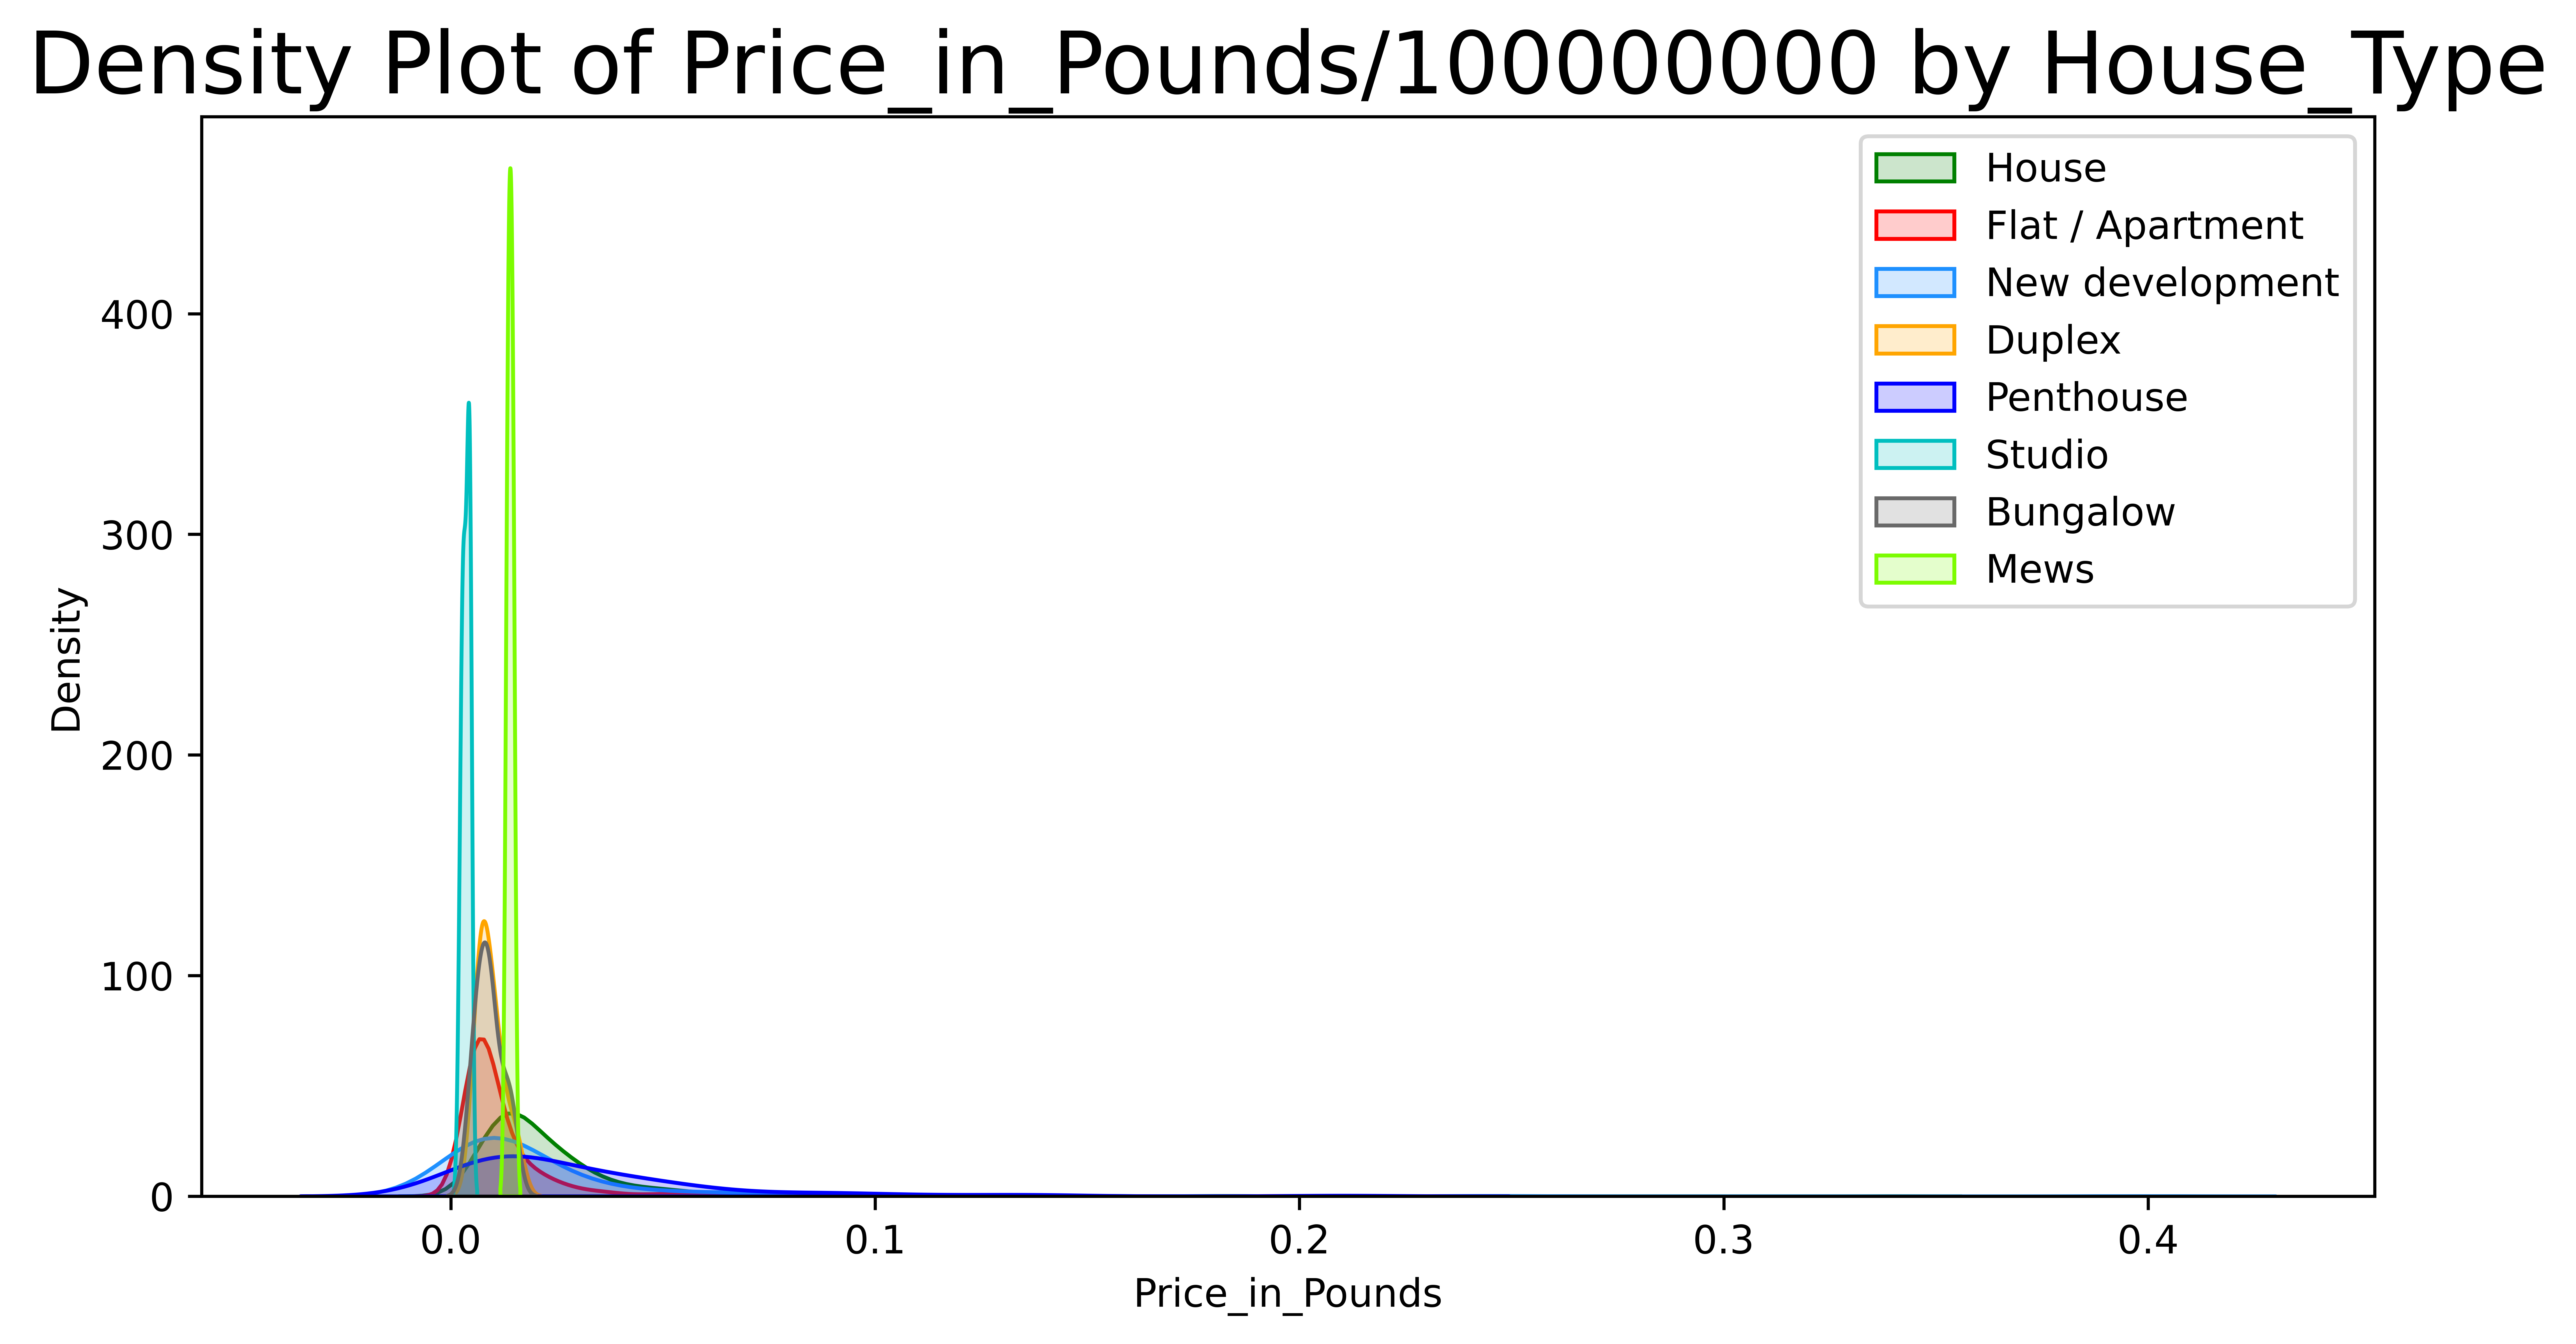

In [ ]:
def price_1(df):
    prices = []
    length = len(df)
    for x in df:
        prices.append((x/100000000))
    return prices


flats_copy_2 = pd.DataFrame({'Price_in_Pounds' : price_1(flats.Price_in_Pounds)})
flats_copy_2['House_Type'] = flats.House_Type



# Import Data
df = flats_copy_2

# Draw Plot
plt.figure(figsize=(10,5
                   ), dpi= 1000)
sns.kdeplot(df.loc[df['House_Type'] == 'House', "Price_in_Pounds"],
            shade=True, color="green", label="House", alpha=.2)
sns.kdeplot(df.loc[df['House_Type'] == 'Flat / Apartment', "Price_in_Pounds"],
            shade=True, color="red", label="Flat / Apartment", alpha=.2)
sns.kdeplot(df.loc[df['House_Type'] == 'New development', "Price_in_Pounds"],
            shade=True, color="dodgerblue", label="New development", alpha=.2)
sns.kdeplot(df.loc[df['House_Type'] == 'Duplex', "Price_in_Pounds"],
            shade=True, color="orange", label="Duplex", alpha=.2)
sns.kdeplot(df.loc[df['House_Type'] == 'Penthouse', "Price_in_Pounds"],
            shade=True, color="blue", label="Penthouse", alpha=.2)
sns.kdeplot(df.loc[df['House_Type'] == 'Studio', "Price_in_Pounds"],
            shade=True, color="c", label="Studio", alpha=.2)
sns.kdeplot(df.loc[df['House_Type'] == 'Bungalow', "Price_in_Pounds"],
            shade=True, color="dimgrey", label="Bungalow", alpha=.2)
sns.kdeplot(df.loc[df['House_Type'] == 'Mews', "Price_in_Pounds"],
            shade=True, color="lawngreen", label="Mews", alpha=.2)

# Decoration
plt.title('Density Plot of Price_in_Pounds/100000000 by House_Type', fontsize=22)
plt.legend()
plt.show()

This graph shows us the density the Price by type of the house

## Plot 2

In [ ]:
x_value = flats.Number_of_Bedrooms.value_counts()
x_index = x_value.index

fig = go.Figure(data=[go.Pie(labels = x_index, values= x_value,
                             title='Bedrooms in Flats', textinfo='label+percent',hole=.5)])
fig.show()

Due to this graphic we can see than in most houses we will find only 2 bedrooms, on the second place there is 3 bedsrooms in the House. And closes the top three: 4 bedrooms in the house. If we try to find House with 10, 9, 8, bedrooms the percentage will be the same on average.

## Plot 3


In [ ]:
def price(df):
    prices = []
    length = len(df)
    for x in df:
        prices.append((x/1000))
    return prices

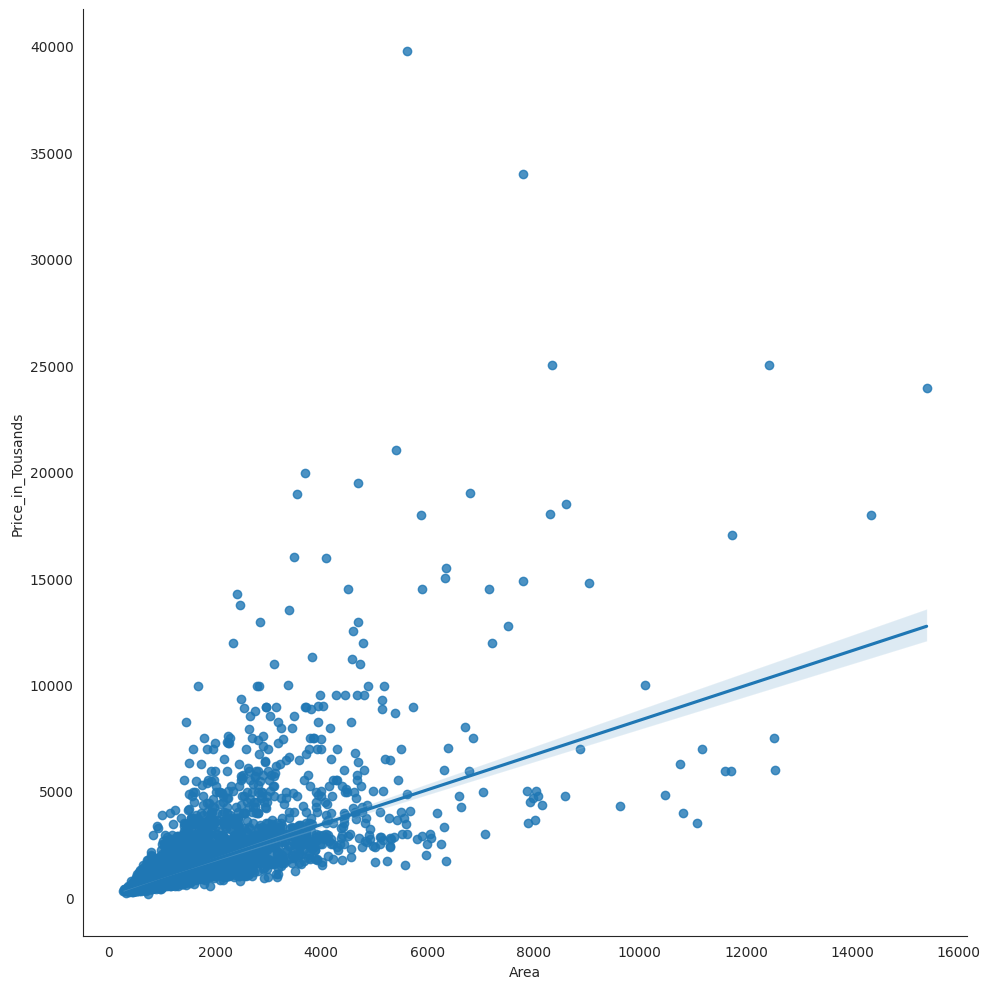

In [ ]:
flats_copy = pd.DataFrame({'Price_in_Tousands' : price(flats.Price_in_Pounds)})
flats_copy['Area'] = flats.Area_in_feets
flats_copy['House_type'] = flats.House_Type_Int



sns.set_style("white")
sns.lmplot(x="Area", y="Price_in_Tousands",
                     data=flats_copy,
                     height=10,
                     robust=True,
                     palette='Set3')

plt.show()

This graph shows us the dencity of the Area by Price_in_Tousands

In [ ]:
! pip install arcGIS

In [ ]:
import arcgis
from arcgis.gis import GIS

my_gis = GIS()
hello_map = my_gis.map("London", zoomlevel = 15)
hello_map.basemap = 'osm'

In [ ]:
def city_address(df):
    addresses = []
    length = len(df)
    for i in range(length):
        if str(df.iloc[i][7]) == 'nan':
            address = str(df.iloc[i][8]) + ', ' + str(df.iloc[i][0]) + ', ' + str(df.iloc[i][9])
        else:
            address = str(df.iloc[i][8]) + ', ' + str(df.iloc[i][7]) + ', ' + str(df.iloc[i][0]) + ', ' + str(df.iloc[i][9])
        addresses.append(address)
    return addresses

flats['Address'] = city_address(flats)

In [ ]:
flats_1000 = flats.head(1000)
flats_2000 = flats[1000:2000]
flats_3000 = flats[2000:3000]
flats_4000 = flats[3000:3480]

flats_loc_1 = my_gis.content.import_data(flats_1000)
flats_loc_2 = my_gis.content.import_data(flats_2000)
flats_loc_3 = my_gis.content.import_data(flats_3000)
flats_loc_4 = my_gis.content.import_data(flats_4000)

flats_loc_1
flats_loc_2
flats_loc_3
flats_loc_4

all_flats_loc = [flats_loc_1, flats_loc_2, flats_loc_3, flats_loc_4]

In [ ]:
flats_map = my_gis.map('London', zoomlevel=10)
flats_map.basemap = 'osm'

flats_map.add_layer(all_flats_loc)
# flats_map.height = '600px'
flats_map

Considering the map above, we can say that the densely populated areas of London are South-West and North. The South area is really clear and there is just a couple of flats. Also due to this map we see 3 settlements located by the provider from London: NorthWood, Buckhurst Hill, Esher and adjacent territories.

In [ ]:
flats_map = my_gis.map('London', zoomlevel=10)
flats_map.basemap = 'osm'

flats_map.add_layer(all_flats_loc, {"renderer":"ClassedColorRenderer", "field_name":"Price_in_Pounds"})
flats_map.height = '600px'
flats_map

According to this map we can say that the most expensive places to live are located near Hyde Park and Zoo. While North-East is the cheapest place to live. In the City centre it will be diffucult to find a place for a living